**Credit card Approval Prediction**

**Features name: (Credit_Card.csv)**

**Ind_ID**: Client ID

**Gender**: Gender information

**Car_owner**: Having car or not

**Propert_owner**: Having property or not

**Children**: Count of children

**Annual_income**: Annual income

**Type_Income**: Income type

**Education**: Education level

**Marital_status**: Marital_status

**Housing_type**: Living style

**Birthday_count**: Use backward count from current day (0), -1 means yesterday.

**Employed_days**: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

**Mobile_phone**: Any mobile phone

**Work_phone**: Any work phone

**Phone**: Any phone number

**EMAIL_ID**: Any email ID

**Type_Occupation**: Occupation

**Family_Members**: Family size


**Another data set (Credit_card_label.csv)** contains two key pieces of information

**ID**: The joining key between application data and credit status data, same is Ind_ID

**Label**: 0 is application approved and 1 is application rejected.

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mgn

In [2]:
# importing the datasets into dataframe

application_data = pd.read_csv('../content/Credit_card.csv')
application_status = pd.read_csv('../content/Credit_card_label.csv')


**Step 1: Dataset Overview and Descriptive Statistics**

In [3]:
application_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [4]:
application_status.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [5]:
# merging the dataset to get a single dataframe with both input features and target variable

application_data_status = application_data.merge(application_status,how='left')
application_data_status.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [6]:
application_data_status.shape

(1548, 19)

In [7]:
application_data_status.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [8]:
application_data_status.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [9]:
application_data_status.describe().round(2)

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1548.00,1548.00,1525.00,1526.00,1548.00,1548.0,1548.00,1548.00,1548.00,1548.00,1548.00
mean,5078920.35,0.41,191399.33,-16040.34,59364.69,1.0,0.21,0.31,0.09,2.16,0.11
std,41717.59,0.78,113253.00,4229.50,137808.06,0.0,0.41,0.46,0.29,0.95,0.32
min,5008827.00,0.00,33750.00,-24946.00,-14887.00,1.0,0.00,0.00,0.00,1.00,0.00
25%,5045069.75,0.00,121500.00,-19553.00,-3174.50,1.0,0.00,0.00,0.00,2.00,0.00
50%,5078841.50,0.00,166500.00,-15661.50,-1565.00,1.0,0.00,0.00,0.00,2.00,0.00
75%,5115673.00,1.00,225000.00,-12417.00,-431.75,1.0,0.00,1.00,0.00,3.00,0.00
max,5150412.00,14.00,1575000.00,-7705.00,365243.00,1.0,1.00,1.00,1.00,15.00,1.00


In [10]:
application_data_status.describe(exclude=[np.number])

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation
count,1541,1548,1548,1548,1548,1548,1548,1060
unique,2,2,2,4,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,973,924,1010,798,1031,1049,1380,268


In [11]:
for column in application_data_status.iloc[:,1:].columns:
  print(application_data_status[column].value_counts(dropna=False))

F      973
M      568
NaN      7
Name: GENDER, dtype: int64
N    924
Y    624
Name: Car_Owner, dtype: int64
Y    1010
N     538
Name: Propert_Owner, dtype: int64
0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64
135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: Annual_income, Length: 116, dtype: int64
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64
Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marit

In [12]:
# checking for duplicate values

application_data_status[application_data_status.duplicated()]

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label


In [13]:
# Checking for missing values

application_data_status.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [14]:
appdatastat = application_data_status.dropna().copy()
appdatastat

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
10,5010869,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,1,1
11,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,1
13,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,5024049,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,-12903.0,-2924,1,0,0,0,Accountants,3,0
1542,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,1,0,1,0,Drivers,3,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0


In [15]:
appdatastat['approx_age'] = round(abs(appdatastat['Birthday_count'])/365).astype('int')
appdatastat['approx_age']

8       50
9       50
10      50
11      52
13      52
        ..
1540    35
1542    31
1544    28
1545    36
1546    42
Name: approx_age, Length: 1025, dtype: int64

In [16]:
appdatastat['years_of_employement'] = round(abs(appdatastat['Employed_days'])/365,2)
appdatastat['years_of_employement']

8       1.86
9       1.86
10      1.86
11      2.75
13      2.75
        ... 
1540    8.01
1542    9.69
1544    3.31
1545    6.79
1546    1.77
Name: years_of_employement, Length: 1025, dtype: float64

In [17]:
appdatastat.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,approx_age,years_of_employement
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-678,1,0,1,1,Core staff,3,1,50,1.86
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,-678,1,0,1,1,Core staff,3,1,50,1.86
10,5010869,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-678,1,0,1,1,Core staff,1,1,50,1.86
11,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,-1002,1,1,1,0,Cooking staff,2,1,52,2.75
13,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,-1002,1,1,1,0,Cooking staff,2,1,52,2.75


**Step 2: Feature Assessment and Visualization**

Univariate Analysis
- Numerical Features -> Histogram, Boxplot (mean,std,skewness,kurtosis,quantile)
- Categorical Features -> Barplots, Countplots (mode, frequency table)

Multivariate Analysis


<Figure size 640x480 with 0 Axes>

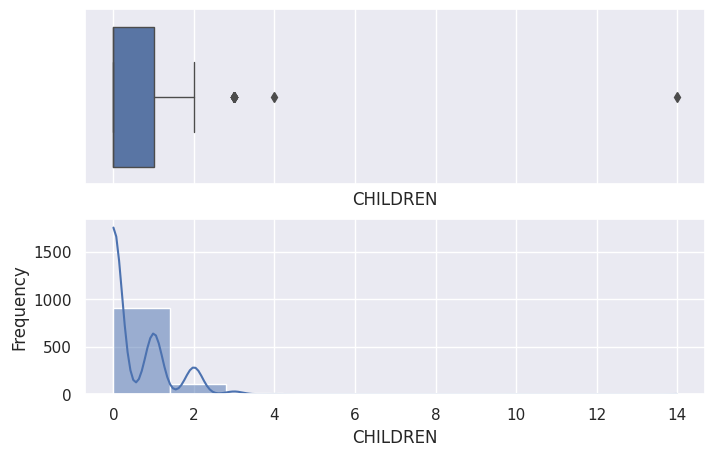

<Figure size 800x500 with 0 Axes>

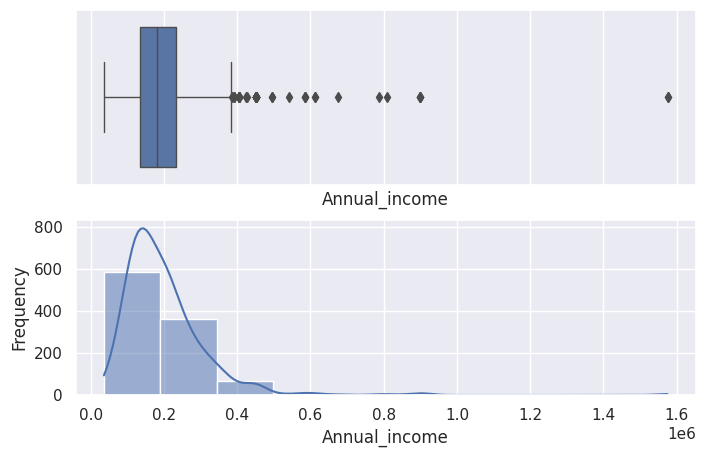

<Figure size 800x500 with 0 Axes>

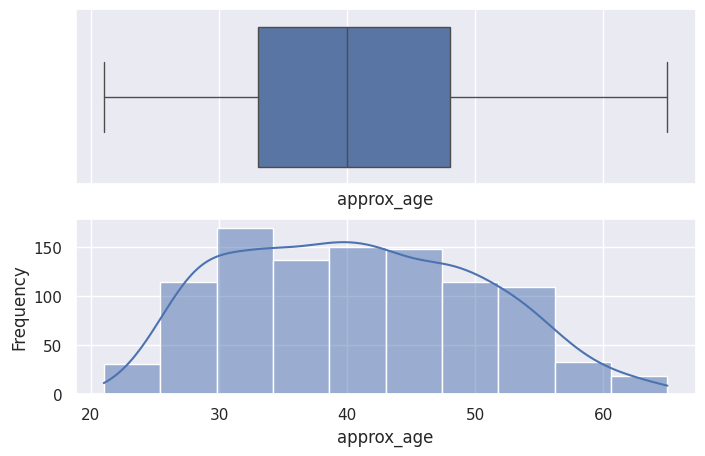

<Figure size 800x500 with 0 Axes>

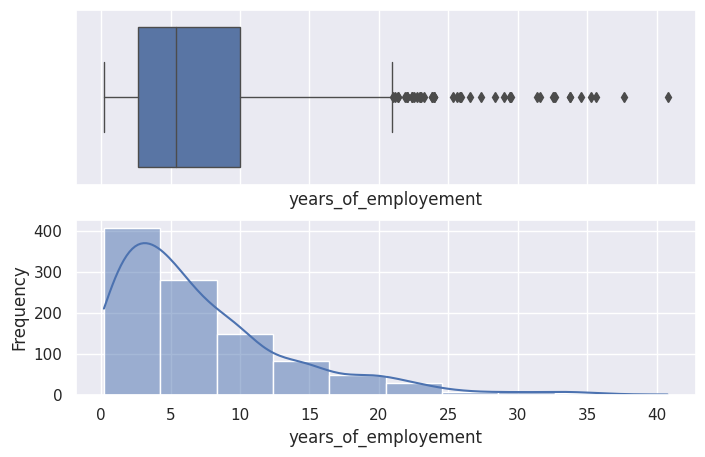

<Figure size 800x500 with 0 Axes>

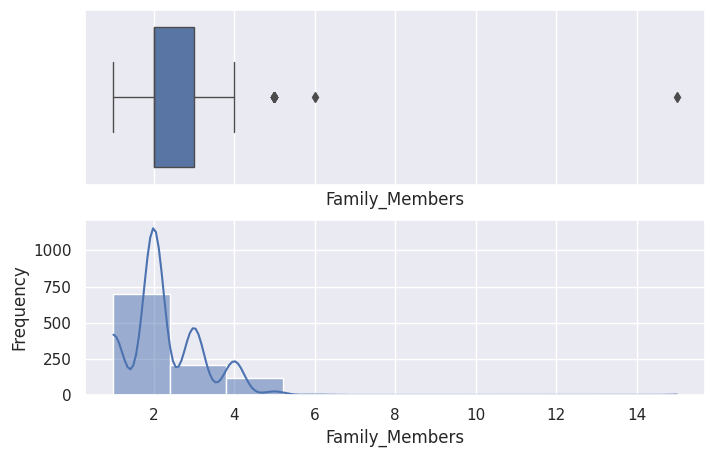

In [18]:
# Checking for outleirs
numerical_columns = ['CHILDREN', 'Annual_income',	'approx_age',	'years_of_employement', 'Family_Members']

for i in numerical_columns:
  plt.figure()
  plt.tight_layout()
  sns.set(rc={"figure.figsize":(8, 5)})
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
  plt.gca().set(xlabel= i,ylabel='Frequency')
  sns.boxplot(x=appdatastat[i], ax=ax_box , linewidth= 1.0)
  sns.histplot(x=appdatastat[i], ax=ax_hist , bins = 10,kde=True)

In [19]:
# extracting outliers values

for col in numerical_columns:
  q1,q2,q3 = np.percentile(appdatastat[col],[25,50,75])
  iqr = q3-q1
  min = q1-1.5*iqr
  max = q3+1.5*iqr
  count = len(appdatastat[(appdatastat[col] < min) | (appdatastat[col] > max)])
  skew = appdatastat[col].skew()
  print(f'{col}: q1: {q1}  q2: {q2}  q3: {q3}  iqr: {iqr}  min: {min}  max: {max}  count: {count}  skew: {skew}')

CHILDREN: q1: 0.0  q2: 0.0  q3: 1.0  iqr: 1.0  min: -1.5  max: 2.5  count: 13  skew: 4.86708694462864
Annual_income: q1: 135000.0  q2: 180000.0  q3: 234000.0  iqr: 99000.0  min: -13500.0  max: 382500.0  count: 51  skew: 4.296527430172019
approx_age: q1: 33.0  q2: 40.0  q3: 48.0  iqr: 15.0  min: 10.5  max: 70.5  count: 0  skew: 0.22175822770028214
years_of_employement: q1: 2.68  q2: 5.39  q3: 9.98  iqr: 7.300000000000001  min: -8.270000000000001  max: 20.93  count: 48  skew: 1.6335494758594262
Family_Members: q1: 2.0  q2: 2.0  q3: 3.0  iqr: 1.0  min: 0.5  max: 4.5  count: 13  skew: 2.5303955123371433


In [20]:
# imputing the outliers

appdatastat['CHILDREN'] = np.where(appdatastat['CHILDREN'] == 14,4,appdatastat['CHILDREN'])
appdatastat['Family_Members'] = np.where(appdatastat['Family_Members'] == 15,5,appdatastat['Family_Members'])

Log_annual_income Skewness : 0.2858772675630949


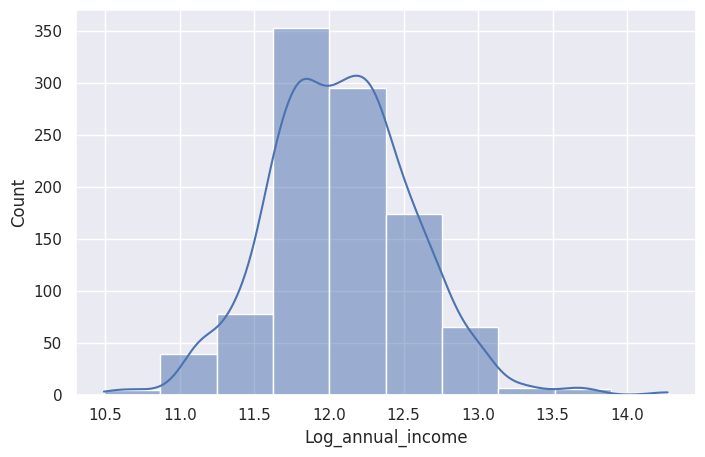

In [21]:
# Log transformation to reduce skewness

appdatastat['Log_annual_income'] = np.log(appdatastat['Annual_income'])
sns.histplot(x=appdatastat['Log_annual_income'] , bins=10, kde=True)
print(f"Log_annual_income Skewness : {appdatastat['Log_annual_income'].skew()}")

Sqrt_years_of_employement Skewness : 0.5786268116824981


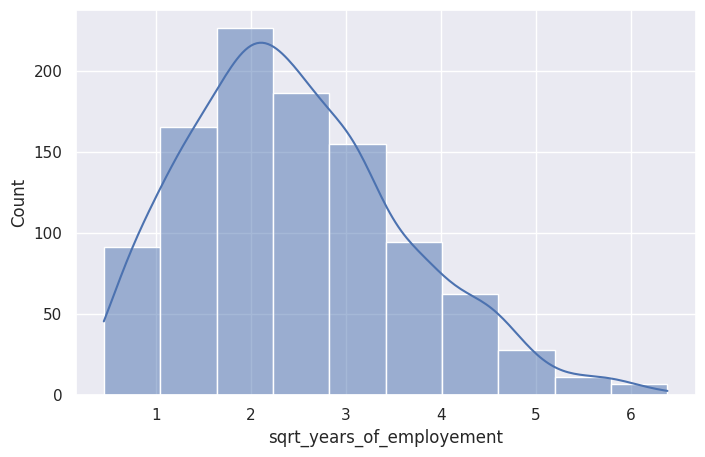

In [22]:
appdatastat['sqrt_years_of_employement'] = np.sqrt(appdatastat['years_of_employement'])
sns.histplot(x=appdatastat['sqrt_years_of_employement'] , bins=10, kde=True)
print(f"Sqrt_years_of_employement Skewness : {appdatastat['sqrt_years_of_employement'].skew()}")

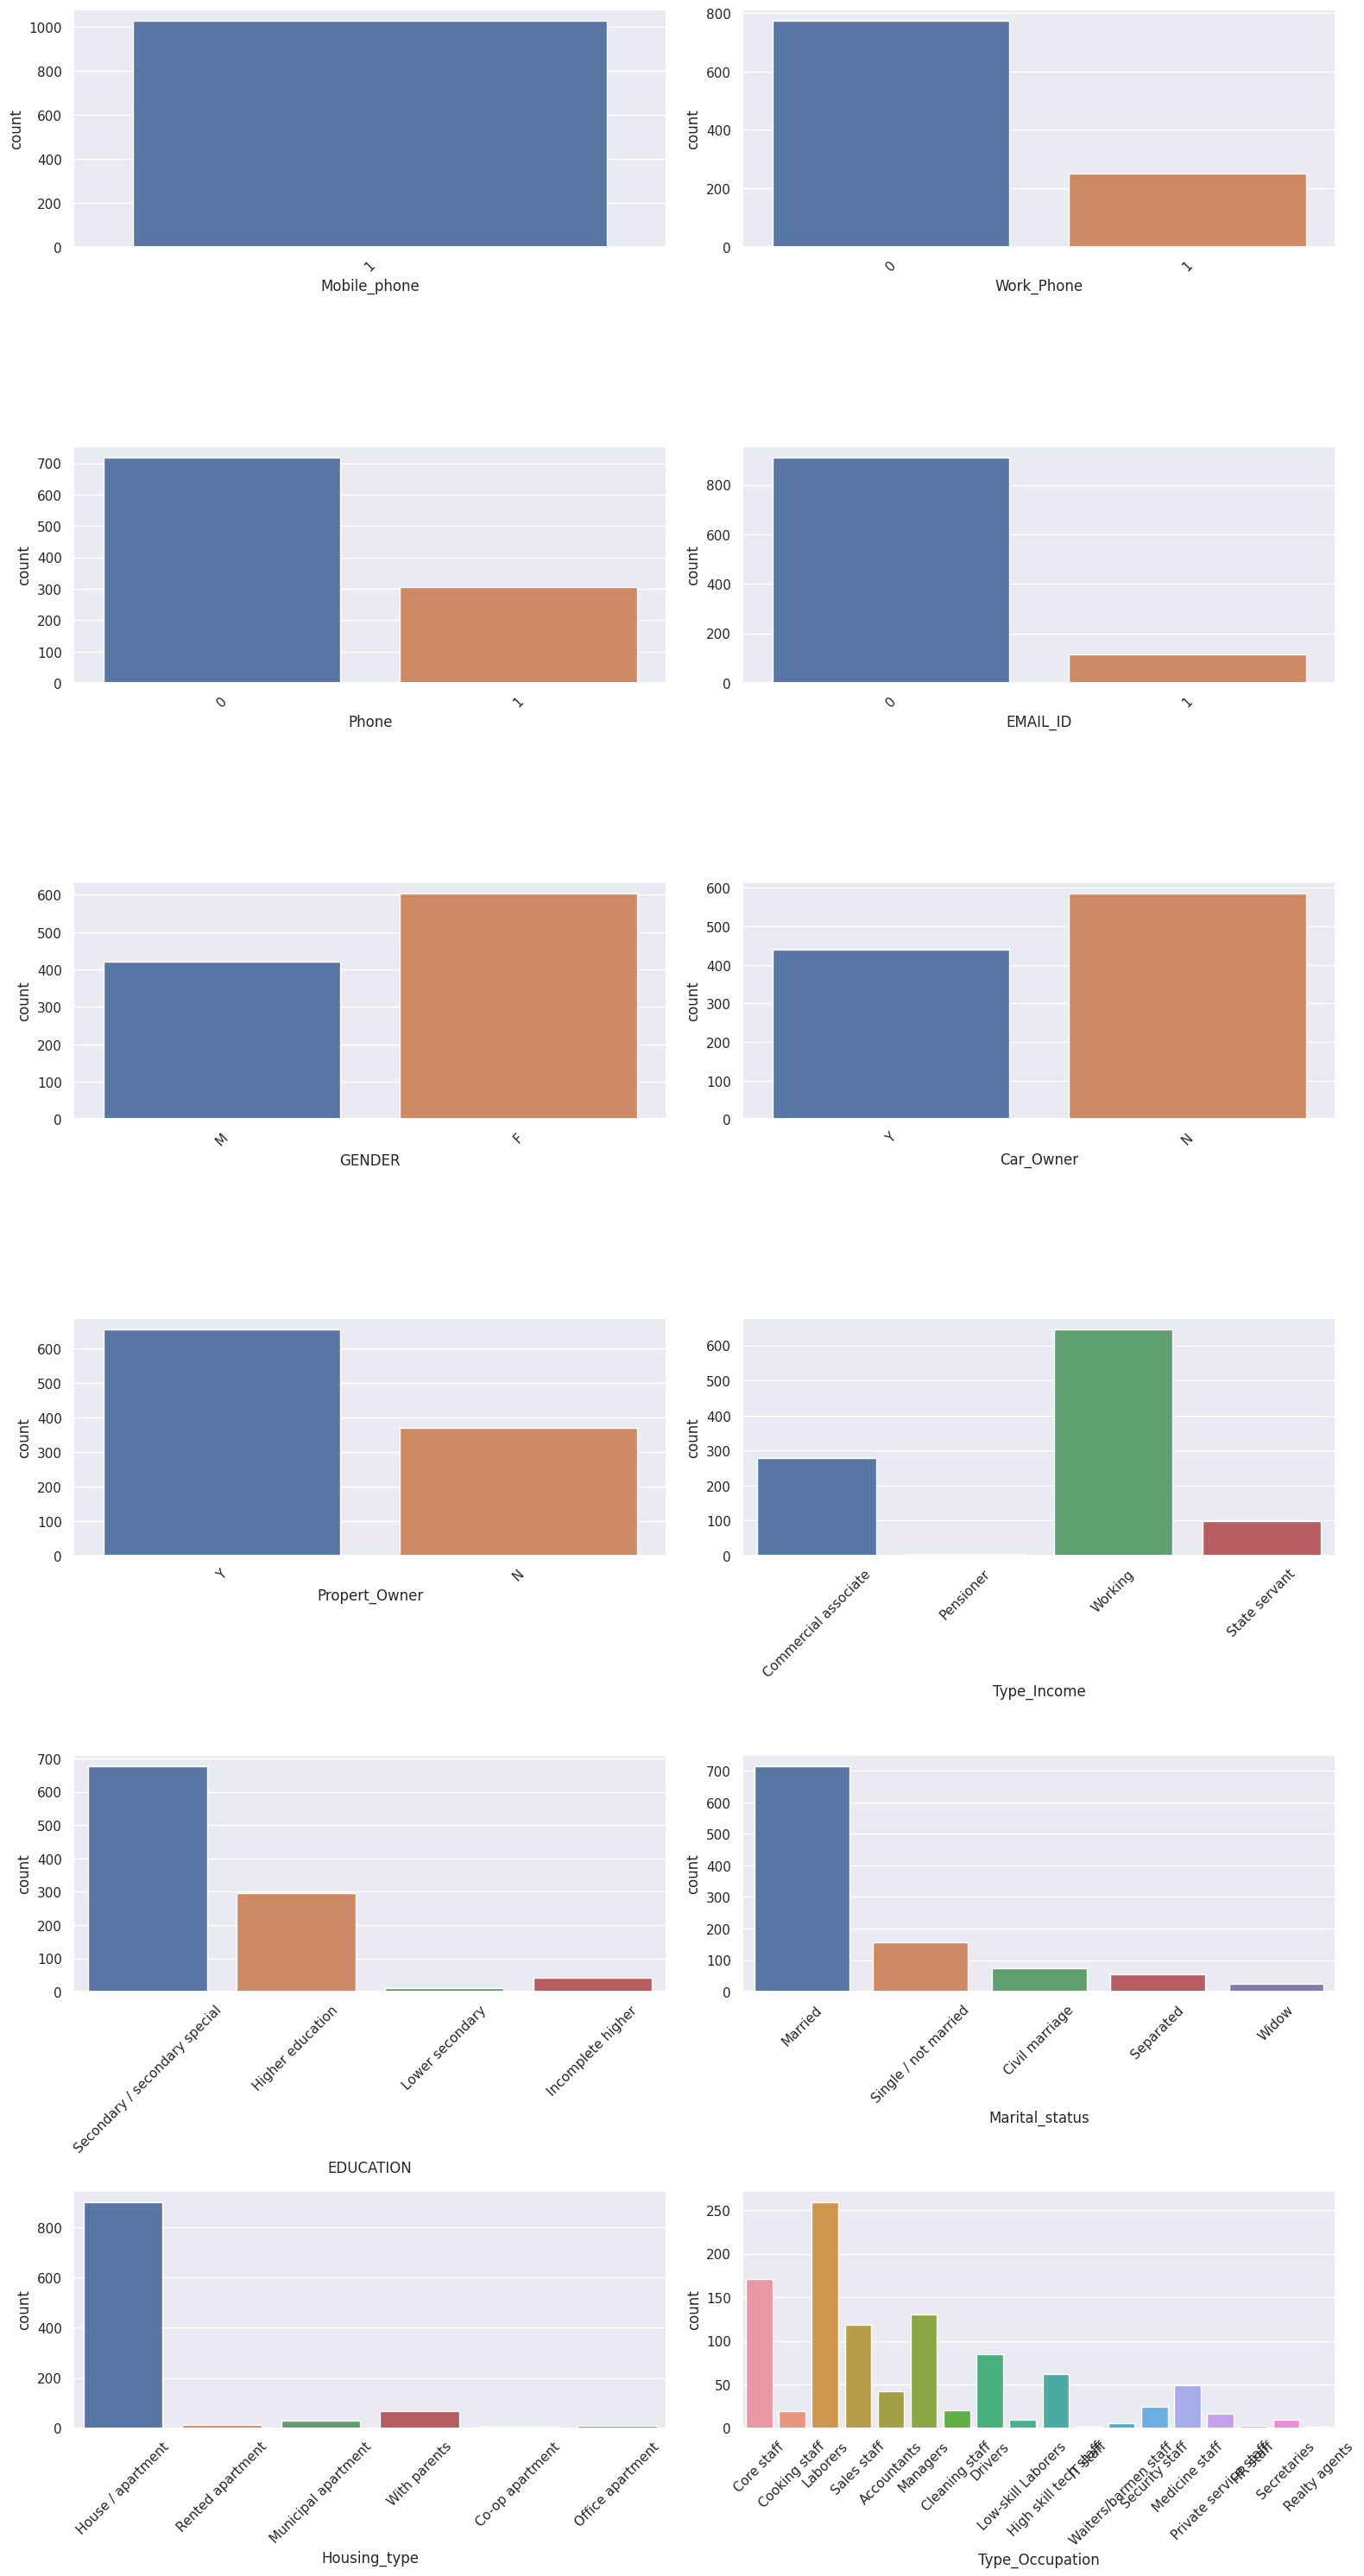

In [23]:

categorical_columns = ['Mobile_phone',	'Work_Phone',	'Phone',	'EMAIL_ID',	'GENDER',	'Car_Owner',	'Propert_Owner',	'Type_Income',	'EDUCATION',	'Marital_status',	'Housing_type',	'Type_Occupation']
fig = plt.figure(figsize = (16,30))
#plt.suptitle("Each column breakdown by Corona", fontsize = 18)

a=6
b=2
c=1

for i in categorical_columns:
    plt.subplot(a, b, c)
    #plt.title(f'{i}, subplot: {a},{b},{c}')
    plt.xlabel(i)
    plt.xticks(rotation = 45)
    sns.countplot(data=appdatastat,x=i)
    c = c + 1

plt.tight_layout()
plt.show()

In [24]:
# Multivariate Analysis
# Correlation between numerical features

appdatastat[['CHILDREN', 'Log_annual_income',	'approx_age',	'sqrt_years_of_employement', 'Family_Members']].corr()

,CHILDREN,Log_annual_income,approx_age,sqrt_years_of_employement,Family_Members
CHILDREN,1.000000,0.031409,-0.218687,-0.033645,0.892964
Log_annual_income,0.031409,1.000000,0.018127,0.047650,0.014529
approx_age,-0.218687,0.018127,1.000000,0.326890,-0.163940
sqrt_years_of_employement,-0.033645,0.047650,0.326890,1.000000,-0.010153
Family_Members,0.892964,0.014529,-0.163940,-0.010153,1.000000


**Here we can see strong correlation between Family_members and Children. Hence we will ignore children feature.**

In [25]:
# Correlation between categorical features

import scipy.stats as ss
from itertools import product

cat_col1 = ['Mobile_phone',	'Work_Phone',	'Phone',	'EMAIL_ID',	'GENDER',	'Car_Owner',	'Propert_Owner',	'Type_Income',	'EDUCATION',	'Marital_status',	'Housing_type',	'Type_Occupation']
cat_col2 = ['Mobile_phone',	'Work_Phone',	'Phone',	'EMAIL_ID',	'GENDER',	'Car_Owner',	'Propert_Owner',	'Type_Income',	'EDUCATION',	'Marital_status',	'Housing_type',	'Type_Occupation']
cat_col_pro = list(product(cat_col1,cat_col2))
cat_col_pro


[('Mobile_phone', 'Mobile_phone'),
 ('Mobile_phone', 'Work_Phone'),
 ('Mobile_phone', 'Phone'),
 ('Mobile_phone', 'EMAIL_ID'),
 ('Mobile_phone', 'GENDER'),
 ('Mobile_phone', 'Car_Owner'),
 ('Mobile_phone', 'Propert_Owner'),
 ('Mobile_phone', 'Type_Income'),
 ('Mobile_phone', 'EDUCATION'),
 ('Mobile_phone', 'Marital_status'),
 ('Mobile_phone', 'Housing_type'),
 ('Mobile_phone', 'Type_Occupation'),
 ('Work_Phone', 'Mobile_phone'),
 ('Work_Phone', 'Work_Phone'),
 ('Work_Phone', 'Phone'),
 ('Work_Phone', 'EMAIL_ID'),
 ('Work_Phone', 'GENDER'),
 ('Work_Phone', 'Car_Owner'),
 ('Work_Phone', 'Propert_Owner'),
 ('Work_Phone', 'Type_Income'),
 ('Work_Phone', 'EDUCATION'),
 ('Work_Phone', 'Marital_status'),
 ('Work_Phone', 'Housing_type'),
 ('Work_Phone', 'Type_Occupation'),
 ('Phone', 'Mobile_phone'),
 ('Phone', 'Work_Phone'),
 ('Phone', 'Phone'),
 ('Phone', 'EMAIL_ID'),
 ('Phone', 'GENDER'),
 ('Phone', 'Car_Owner'),
 ('Phone', 'Propert_Owner'),
 ('Phone', 'Type_Income'),
 ('Phone', 'EDUCATION'

In [26]:
result = list()
for i in cat_col_pro:
  if i[0] != i[1]:
    result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                              appdatastat[i[0]], appdatastat[i[1]])))[1]))

result

[('Mobile_phone', 'Work_Phone', 1.0),
 ('Mobile_phone', 'Phone', 1.0),
 ('Mobile_phone', 'EMAIL_ID', 1.0),
 ('Mobile_phone', 'GENDER', 1.0),
 ('Mobile_phone', 'Car_Owner', 1.0),
 ('Mobile_phone', 'Propert_Owner', 1.0),
 ('Mobile_phone', 'Type_Income', 1.0),
 ('Mobile_phone', 'EDUCATION', 1.0),
 ('Mobile_phone', 'Marital_status', 1.0),
 ('Mobile_phone', 'Housing_type', 1.0),
 ('Mobile_phone', 'Type_Occupation', 1.0),
 ('Work_Phone', 'Mobile_phone', 1.0),
 ('Work_Phone', 'Phone', 8.848529719068135e-40),
 ('Work_Phone', 'EMAIL_ID', 0.13207259999424872),
 ('Work_Phone', 'GENDER', 0.7401359749892484),
 ('Work_Phone', 'Car_Owner', 0.32791439028704156),
 ('Work_Phone', 'Propert_Owner', 8.934743271269171e-07),
 ('Work_Phone', 'Type_Income', 0.03139196873242659),
 ('Work_Phone', 'EDUCATION', 0.02227059731906775),
 ('Work_Phone', 'Marital_status', 0.2532212923910056),
 ('Work_Phone', 'Housing_type', 0.2200119414644582),
 ('Work_Phone', 'Type_Occupation', 0.6145999624216028),
 ('Phone', 'Mobile_p

In [27]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2',
                                                      'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2,Car_Owner,EDUCATION,EMAIL_ID,GENDER,Housing_type,Marital_status,Mobile_phone,Phone,Propert_Owner,Type_Income,Type_Occupation,Work_Phone
var1,,,,,,,,,,,,
Car_Owner,NaN,7.125620e-03,1.000000,7.123646e-28,1.390475e-02,2.980243e-05,1.0,7.675060e-01,4.837969e-01,8.857630e-01,1.056372e-11,3.279144e-01
EDUCATION,7.125620e-03,NaN,0.008898,7.385217e-01,1.652380e-04,5.705103e-01,1.0,6.136186e-01,3.568884e-02,3.880949e-03,9.583264e-20,2.227060e-02
EMAIL_ID,1.000000e+00,8.898129e-03,NaN,3.517144e-02,8.357200e-01,3.113220e-02,1.0,1.000000e+00,1.595082e-02,1.519353e-02,3.060781e-04,1.320726e-01
GENDER,7.123646e-28,7.385217e-01,0.035171,NaN,3.051122e-01,1.368264e-04,1.0,3.686256e-01,2.256884e-01,3.850649e-01,1.209945e-57,7.401360e-01
Housing_type,1.390475e-02,1.652380e-04,0.835720,3.051122e-01,NaN,8.133429e-07,1.0,3.873024e-01,1.094576e-07,8.518315e-01,1.980134e-02,2.200119e-01
Marital_status,2.980243e-05,5.705103e-01,0.031132,1.368264e-04,8.133429e-07,NaN,1.0,1.410662e-01,8.487576e-01,4.504257e-01,1.773768e-02,2.532213e-01
Mobile_phone,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Phone,7.675060e-01,6.136186e-01,1.000000,3.686256e-01,3.873024e-01,1.410662e-01,1.0,NaN,3.254811e-02,5.501195e-02,3.689174e-01,8.848530e-40
Propert_Owner,4.837969e-01,3.568884e-02,0.015951,2.256884e-01,1.094576e-07,8.487576e-01,1.0,3.254811e-02,NaN,3.595354e-01,6.768957e-01,8.934743e-07


Null Hypothesis is that 'no relationship exists between two variables'. The P-value for Null hypothesis is 0.05.

There exists a relationship between two variables if p value ≤ 0.05 and we will reject the null huypothesis.

1. Car_owner and gender
2. Car_owner and type_occupation
3. Education and type_occupation
4. Email_id and type_occupation
5. Gender and type_occupation
6. Phone and work_phone
7. type_income and type_occupation

**Here we will ignore the work_phone for now**

In [28]:
appdatastat['label'].value_counts()

0    915
1    110
Name: label, dtype: int64

In [29]:
appdatastat.head(2)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,approx_age,years_of_employement,Log_annual_income,sqrt_years_of_employement
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,1,1,Core staff,3,1,50,1.86,13.017003,1.363818
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,1,Core staff,3,1,50,1.86,13.017003,1.363818


In [30]:
# Seperating the input and target variables

X = appdatastat.drop(columns=['Ind_ID','Annual_income','Birthday_count','Employed_days','CHILDREN','Work_Phone','years_of_employement','label'],axis=1)
y = appdatastat['label']

In [31]:
# Splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)


In [32]:
X_train.shape

(768, 15)

In [33]:
X_train.GENDER.value_counts()

F    438
M    330
Name: GENDER, dtype: int64

In [36]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.0 MB/s eta 0:00:00


In [37]:
# Encoding categorical features

# We will use Binary encoding for multiclass categorical features to keep the column count low
# We will use the get_dummies for binary class categorical features

from category_encoders.binary import BinaryEncoder

binary_cat_col = ['Mobile_phone',	'Phone',	'EMAIL_ID',	'GENDER',	'Car_Owner',	'Propert_Owner']
multiclass_cat_col = ['Type_Income',	'EDUCATION',	'Marital_status',	'Housing_type',	'Type_Occupation']

X_train_enc_bin_cat = pd.get_dummies(X_train[binary_cat_col], drop_first=True)
X_test_enc_bin_cat = pd.get_dummies(X_test[binary_cat_col], drop_first=True)

be = BinaryEncoder(cols=multiclass_cat_col, drop_invariant=True)
be.fit(X_train[multiclass_cat_col])
be.fit(X_test[multiclass_cat_col])

X_train_enc_multi_cat = be.transform(X_train[multiclass_cat_col])
X_test_enc_multi_cat = be.transform(X_test[multiclass_cat_col])

In [38]:
# Standard scaling of numerical columns
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
numerical_columns = ['approx_age',	'Log_annual_income',	'sqrt_years_of_employement', 'Family_Members']
sc.fit(X_train[numerical_columns])
sc.fit(X_test[numerical_columns])
X_train_scale_num = pd.DataFrame(sc.transform(X_train[numerical_columns]), index=X_train[numerical_columns].index, columns=numerical_columns)
X_test_scale_num = pd.DataFrame(sc.transform(X_test[numerical_columns]), index=X_test[numerical_columns].index, columns=numerical_columns)

In [39]:
X_train_enc_scale = pd.concat([pd.concat([X_train_enc_bin_cat,X_train_enc_multi_cat],axis=1, join='inner'),X_train_scale_num],axis=1, join='inner')
X_train_enc_scale

,Mobile_phone,Phone,EMAIL_ID,GENDER_M,Car_Owner_Y,Propert_Owner_Y,Type_Income_0,Type_Income_1,Type_Income_2,EDUCATION_0,...,Housing_type_1,Housing_type_2,Type_Occupation_0,Type_Occupation_1,Type_Occupation_2,Type_Occupation_3,approx_age,Log_annual_income,sqrt_years_of_employement,Family_Members
706,1,0,0,0,0,0,0,1,0,1,...,1,1,0,1,1,1,0.476227,0.026727,0.866613,-1.481237
301,1,1,0,1,0,0,0,0,1,1,...,1,1,0,0,0,1,-0.346565,-0.079222,1.248519,2.021934
398,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,-1.169357,0.270013,-0.062948,2.021934
776,1,1,0,1,0,0,0,0,1,1,...,0,1,0,1,0,0,-0.449414,0.026727,0.912818,-0.313513
1323,1,1,0,0,1,0,0,0,1,1,...,0,1,1,0,1,1,0.064831,-1.865912,-1.627027,-0.313513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1,0,0,0,0,1,0,0,1,1,...,0,1,0,1,0,0,1.607566,-0.249088,-0.333733,-0.313513
203,1,0,0,0,0,1,0,0,1,1,...,0,1,1,1,1,0,-1.477905,-1.404999,-1.489733,2.021934
567,1,0,0,1,0,1,0,1,0,1,...,0,1,0,0,1,1,-0.757961,1.458452,0.687079,-0.313513
495,1,1,1,0,1,1,0,0,1,0,...,0,1,0,1,1,1,-0.346565,0.864233,-1.782797,-0.313513


In [40]:
X_test_enc_scale = pd.concat([pd.concat([X_test_enc_bin_cat,X_test_enc_multi_cat],axis=1, join='inner'),X_test_scale_num],axis=1, join='inner')
X_test_enc_scale

,Mobile_phone,Phone,EMAIL_ID,GENDER_M,Car_Owner_Y,Propert_Owner_Y,Type_Income_0,Type_Income_1,Type_Income_2,EDUCATION_0,...,Housing_type_1,Housing_type_2,Type_Occupation_0,Type_Occupation_1,Type_Occupation_2,Type_Occupation_3,approx_age,Log_annual_income,sqrt_years_of_employement,Family_Members
949,1,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,-0.449414,0.487639,-0.852849,0.854210
291,1,0,0,1,1,1,0,1,0,1,...,1,0,0,0,1,0,0.579076,1.182638,-0.197938,-0.313513
840,1,1,0,0,1,0,0,1,0,1,...,0,1,0,0,0,1,1.299019,1.182638,-0.779515,-0.313513
947,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0.064831,0.270013,1.087804,-0.313513
1237,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,1,-1.683603,-0.567493,-0.740221,-1.481237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,1,0,0,0,0,1,0,0,1,1,...,0,1,1,1,1,0,1.813264,-0.567493,0.353832,-0.313513
69,1,0,0,1,0,0,0,0,1,1,...,1,1,0,1,1,1,-1.683603,1.631713,-1.270237,-1.481237
1382,1,0,0,0,1,1,0,0,1,0,...,0,1,0,0,1,1,-1.683603,-0.944086,-1.367367,0.854210
282,1,0,0,0,0,0,0,1,1,1,...,0,0,1,0,1,1,0.579076,-0.944086,2.270133,-0.313513


In [57]:
print(y_train.value_counts())
print(y_test.value_counts())

0    679
1     89
Name: label, dtype: int64
0    236
1     21
Name: label, dtype: int64


In [58]:
# Performing SMOTE(over-sampling) and Tomeklinks(under-sampling) both to deal with imbalanced dataset
from imblearn.combine import SMOTETomek

smtk = SMOTETomek(random_state=42)
X_train_res, y_train_res = smtk.fit_resample(X_train_enc_scale,y_train)
X_test_res, y_test_res = smtk.fit_resample(X_test_enc_scale,y_test)

print(X_train_res)
print(y_train_res)

      Mobile_phone  Phone  EMAIL_ID  GENDER_M  Car_Owner_Y  Propert_Owner_Y  \
0                1      0         0         0            0                0   
1                1      1         0         1            0                0   
2                1      0         1         0            0                1   
3                1      1         0         1            0                0   
4                1      1         0         0            1                0   
...            ...    ...       ...       ...          ...              ...   
1353             1      0         0         0            1                1   
1354             1      0         0         1            0                0   
1355             1      0         0         1            1                0   
1356             1      0         0         1            0                1   
1357             1      0         0         1            1                0   

      Type_Income_0  Type_Income_1  Type_Income_2  

**Model creation and training**

Here we will employ :
1. Logistic Regression
2. DecisionTreeClassifier
3. RandomForestClassifier
4. GradientBoostingClassifier
5. XGBboostingClassifier
6. K-nearest neighbour Classifier

Also, we will put in force the HyperParameter Tuning and Cross Validation

**Logistic Regression**

In [59]:
from sklearn.linear_model import LogisticRegressionCV

lr_classifier = LogisticRegressionCV(cv=5, solver='saga',max_iter=5000, penalty='elasticnet',l1_ratios=[0.5])

lr_classifier.fit(X_train_res,y_train_res)

lr_y_train_pred = lr_classifier.predict(X_train_res)
lr_y_test_pred = lr_classifier.predict(X_test_res)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

print('Training Data Metrics:')
print(f'confusion_matrix:\n {confusion_matrix(y_train_res,lr_y_train_pred)}')
print(f'accuracy_score:\n {accuracy_score(y_train_res,lr_y_train_pred)}')
print(f'precision_score:\n {precision_score(y_train_res,lr_y_train_pred)}')
print(f'recall_score:\n {recall_score(y_train_res,lr_y_train_pred)}')
print(f'f1_score:\n {f1_score(y_train_res,lr_y_train_pred)}')
print(f'classification_report:\n {classification_report(y_train_res,lr_y_train_pred)}')


Training Data Metrics:
confusion_matrix:
 [[550 129]
 [130 549]]
accuracy_score:
 0.8092783505154639
precision_score:
 0.8097345132743363
recall_score:
 0.8085419734904271
f1_score:
 0.8091378039793662
classification_report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       679
           1       0.81      0.81      0.81       679

    accuracy                           0.81      1358
   macro avg       0.81      0.81      0.81      1358
weighted avg       0.81      0.81      0.81      1358



In [62]:
print('Testing Data Metrics:')
print(f'confusion_matrix:\n {confusion_matrix(y_test_res,lr_y_test_pred)}')
print(f'accuracy_score:\n {accuracy_score(y_test_res,lr_y_test_pred)}')
print(f'precision_score:\n {precision_score(y_test_res,lr_y_test_pred)}')
print(f'recall_score:\n {recall_score(y_test_res,lr_y_test_pred)}')
print(f'f1_score:\n {f1_score(y_test_res,lr_y_test_pred)}')
print(f'classification_report:\n {classification_report(y_test_res,lr_y_test_pred)}')

Testing Data Metrics:
confusion_matrix:
 [[193  43]
 [ 44 192]]
accuracy_score:
 0.815677966101695
precision_score:
 0.8170212765957446
recall_score:
 0.8135593220338984
f1_score:
 0.8152866242038217
classification_report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       236
           1       0.82      0.81      0.82       236

    accuracy                           0.82       472
   macro avg       0.82      0.82      0.82       472
weighted avg       0.82      0.82      0.82       472



**Decision Tree Classifier**

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2,5,10,15,20]
}

dt_gscv = GridSearchCV(DecisionTreeClassifier(),param_grid=params,cv=10)

dt_gscv.fit(X_train_res, y_train_res)

dt_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 15}

In [125]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=15)
dt_classifier.fit(X_train_res, y_train_res)

dt_y_train_pred = dt_classifier.predict(X_train_res)
dt_y_test_pred = dt_classifier.predict(X_test_res)

In [126]:
print('Training Data Metrics:')
print(f'confusion_matrix:\n {confusion_matrix(y_train_res,dt_y_train_pred)}')
print(f'accuracy_score:\n {accuracy_score(y_train_res,dt_y_train_pred)}')
print(f'precision_score:\n {precision_score(y_train_res,dt_y_train_pred)}')
print(f'recall_score:\n {recall_score(y_train_res,dt_y_train_pred)}')
print(f'f1_score:\n {f1_score(y_train_res,dt_y_train_pred)}')
print(f'classification_report:\n {classification_report(y_train_res,dt_y_train_pred)}')

Training Data Metrics:
confusion_matrix:
 [[677   2]
 [  3 676]]
accuracy_score:
 0.9963181148748159
precision_score:
 0.9970501474926253
recall_score:
 0.9955817378497791
f1_score:
 0.9963154016212232
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       679
           1       1.00      1.00      1.00       679

    accuracy                           1.00      1358
   macro avg       1.00      1.00      1.00      1358
weighted avg       1.00      1.00      1.00      1358



Testing Data Metrics:
confusion_matrix:
 [[197  39]
 [ 91 145]]
accuracy_score:
 0.7245762711864406
precision_score:
 0.7880434782608695
recall_score:
 0.614406779661017
f1_score:
 0.6904761904761905
classification_report:
               precision    recall  f1-score   support

           0       0.68      0.83      0.75       236
           1       0.79      0.61      0.69       236

    accuracy                           0.72       472
   macro avg       0.74      0.72      0.72       472
weighted avg       0.74      0.72      0.72       472



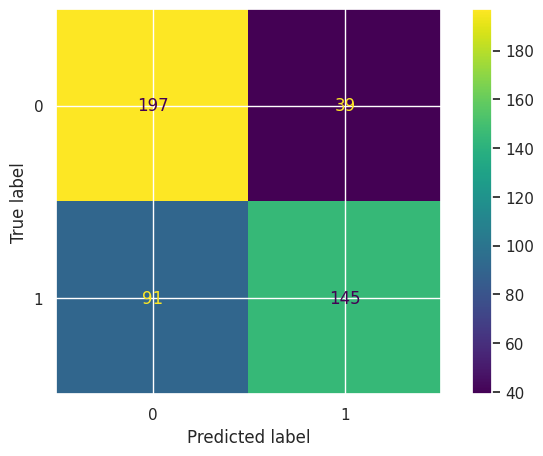

In [127]:
from sklearn.metrics import ConfusionMatrixDisplay
print('Testing Data Metrics:')
print(f'confusion_matrix:\n {confusion_matrix(y_test_res,dt_y_test_pred)}')
print(f'accuracy_score:\n {accuracy_score(y_test_res,dt_y_test_pred)}')
print(f'precision_score:\n {precision_score(y_test_res,dt_y_test_pred)}')
print(f'recall_score:\n {recall_score(y_test_res,dt_y_test_pred)}')
print(f'f1_score:\n {f1_score(y_test_res,dt_y_test_pred)}')
print(f'classification_report:\n {classification_report(y_test_res,dt_y_test_pred)}')
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test_res,dt_y_test_pred))
cmd.plot()

**Random Forest Classifier**

In [129]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2,5,10,15],
    'max_features' :['sqrt', 'log2',None]
}

rn_gscv = GridSearchCV(RandomForestClassifier(),param_grid=params,cv=5)

rn_gscv.fit(X_train_res, y_train_res)

rn_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2'}

In [130]:
rn_classifier = RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2')

rn_classifier.fit(X_train_res, y_train_res)

rn_y_train_pred = rn_classifier.predict(X_train_res)
rn_y_test_pred = rn_classifier.predict(X_test_res)

In [134]:
print('Training Data Metrics:')
print(f'confusion_matrix:\n {confusion_matrix(y_train_res,rn_y_train_pred)}')
print(f'accuracy_score:\n {accuracy_score(y_train_res,rn_y_train_pred)}')
print(f'precision_score:\n {precision_score(y_train_res,rn_y_train_pred)}')
print(f'recall_score:\n {recall_score(y_train_res,rn_y_train_pred)}')
print(f'f1_score:\n {f1_score(y_train_res,rn_y_train_pred)}')
print(f'classification_report:\n {classification_report(y_train_res,rn_y_train_pred)}')

Training Data Metrics:
confusion_matrix:
 [[676   3]
 [  3 676]]
accuracy_score:
 0.9955817378497791
precision_score:
 0.9955817378497791
recall_score:
 0.9955817378497791
f1_score:
 0.9955817378497791
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       679
           1       1.00      1.00      1.00       679

    accuracy                           1.00      1358
   macro avg       1.00      1.00      1.00      1358
weighted avg       1.00      1.00      1.00      1358



Testing Data Metrics:
confusion_matrix:
 [[229   7]
 [ 91 145]]
accuracy_score:
 0.7923728813559322
precision_score:
 0.9539473684210527
recall_score:
 0.614406779661017
f1_score:
 0.7474226804123713
classification_report:
               precision    recall  f1-score   support

           0       0.72      0.97      0.82       236
           1       0.95      0.61      0.75       236

    accuracy                           0.79       472
   macro avg       0.83      0.79      0.79       472
weighted avg       0.83      0.79      0.79       472



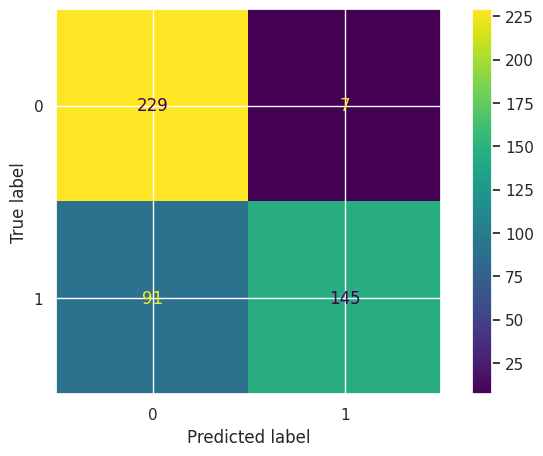

In [135]:
print('Testing Data Metrics:')
print(f'confusion_matrix:\n {confusion_matrix(y_test_res,rn_y_test_pred)}')
print(f'accuracy_score:\n {accuracy_score(y_test_res,rn_y_test_pred)}')
print(f'precision_score:\n {precision_score(y_test_res,rn_y_test_pred)}')
print(f'recall_score:\n {recall_score(y_test_res,rn_y_test_pred)}')
print(f'f1_score:\n {f1_score(y_test_res,rn_y_test_pred)}')
print(f'classification_report:\n {classification_report(y_test_res,rn_y_test_pred)}')
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test_res,rn_y_test_pred))
cmd.plot()

**Gradient Boosting Classifier**

In [136]:
from sklearn.ensemble import GradientBoostingClassifier

params = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.01,0.03,0.05,0.1],
    'criterion': ['friedman_mse', 'squared_error'],
    'max_features' :['sqrt', 'log2',None]
}

gc_gscv = GridSearchCV(GradientBoostingClassifier(),param_grid=params,cv=5)

gc_gscv.fit(X_train_res, y_train_res)

gc_gscv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_features': None}

In [137]:
gb_classifier = GradientBoostingClassifier(criterion='friedman_mse', loss='log_loss', max_features=None, learning_rate=0.1)

gb_classifier.fit(X_train_res, y_train_res)

gb_y_train_pred = gb_classifier.predict(X_train_res)
gb_y_test_pred = gb_classifier.predict(X_test_res)

In [138]:
print('Training Data Metrics:')
print(f'confusion_matrix:\n {confusion_matrix(y_train_res,gb_y_train_pred)}')
print(f'accuracy_score:\n {accuracy_score(y_train_res,gb_y_train_pred)}')
print(f'precision_score:\n {precision_score(y_train_res,gb_y_train_pred)}')
print(f'recall_score:\n {recall_score(y_train_res,gb_y_train_pred)}')
print(f'f1_score:\n {f1_score(y_train_res,gb_y_train_pred)}')
print(f'classification_report:\n {classification_report(y_train_res,gb_y_train_pred)}')

Training Data Metrics:
confusion_matrix:
 [[654  25]
 [ 25 654]]
accuracy_score:
 0.9631811487481591
precision_score:
 0.9631811487481591
recall_score:
 0.9631811487481591
f1_score:
 0.9631811487481591
classification_report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       679
           1       0.96      0.96      0.96       679

    accuracy                           0.96      1358
   macro avg       0.96      0.96      0.96      1358
weighted avg       0.96      0.96      0.96      1358



Testing Data Metrics:
confusion_matrix:
 [[219  17]
 [ 39 197]]
accuracy_score:
 0.8813559322033898
precision_score:
 0.9205607476635514
recall_score:
 0.8347457627118644
f1_score:
 0.8755555555555556
classification_report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       236
           1       0.92      0.83      0.88       236

    accuracy                           0.88       472
   macro avg       0.88      0.88      0.88       472
weighted avg       0.88      0.88      0.88       472



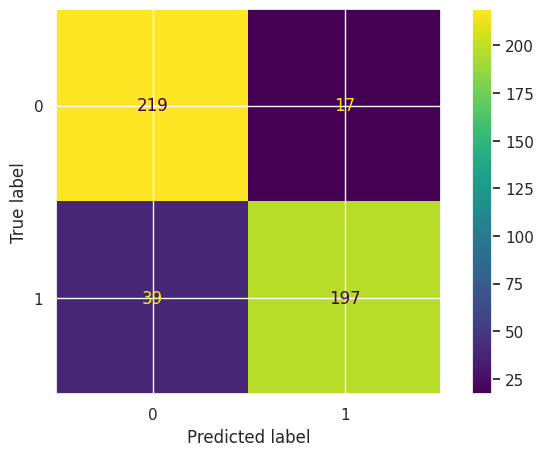

In [139]:
print('Testing Data Metrics:')
print(f'confusion_matrix:\n {confusion_matrix(y_test_res,gb_y_test_pred)}')
print(f'accuracy_score:\n {accuracy_score(y_test_res,gb_y_test_pred)}')
print(f'precision_score:\n {precision_score(y_test_res,gb_y_test_pred)}')
print(f'recall_score:\n {recall_score(y_test_res,gb_y_test_pred)}')
print(f'f1_score:\n {f1_score(y_test_res,gb_y_test_pred)}')
print(f'classification_report:\n {classification_report(y_test_res,gb_y_test_pred)}')
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test_res,gb_y_test_pred))
cmd.plot()

**eXtreme Gradient Boosting Classifier**

In [145]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(objective="binary:logistic")

xgb_classifier.fit(X_train_res, y_train_res)

xgb_y_train_pred = xgb_classifier.predict(X_train_res)
xgb_y_test_pred = xgb_classifier.predict(X_test_res)

In [146]:
print('Training Data Metrics:')
print(f'confusion_matrix:\n {confusion_matrix(y_train_res,xgb_y_train_pred)}')
print(f'accuracy_score:\n {accuracy_score(y_train_res,xgb_y_train_pred)}')
print(f'precision_score:\n {precision_score(y_train_res,xgb_y_train_pred)}')
print(f'recall_score:\n {recall_score(y_train_res,xgb_y_train_pred)}')
print(f'f1_score:\n {f1_score(y_train_res,xgb_y_train_pred)}')
print(f'classification_report:\n {classification_report(y_train_res,xgb_y_train_pred)}')

Training Data Metrics:
confusion_matrix:
 [[676   3]
 [  2 677]]
accuracy_score:
 0.9963181148748159
precision_score:
 0.9955882352941177
recall_score:
 0.9970544918998527
f1_score:
 0.9963208241353937
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       679
           1       1.00      1.00      1.00       679

    accuracy                           1.00      1358
   macro avg       1.00      1.00      1.00      1358
weighted avg       1.00      1.00      1.00      1358



Testing Data Metrics:
confusion_matrix:
 [[225  11]
 [ 69 167]]
accuracy_score:
 0.8305084745762712
precision_score:
 0.9382022471910112
recall_score:
 0.7076271186440678
f1_score:
 0.8067632850241545
classification_report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       236
           1       0.94      0.71      0.81       236

    accuracy                           0.83       472
   macro avg       0.85      0.83      0.83       472
weighted avg       0.85      0.83      0.83       472



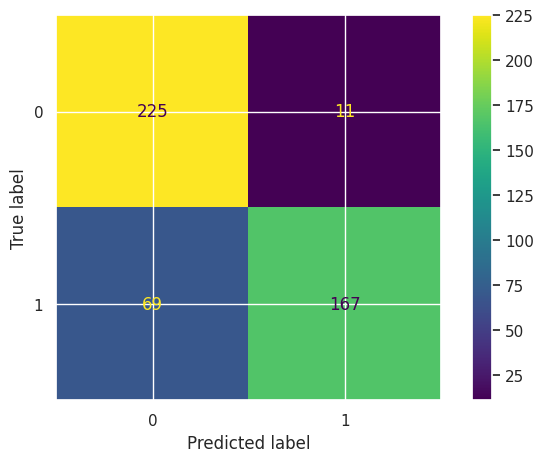

In [147]:
print('Testing Data Metrics:')
print(f'confusion_matrix:\n {confusion_matrix(y_test_res,xgb_y_test_pred)}')
print(f'accuracy_score:\n {accuracy_score(y_test_res,xgb_y_test_pred)}')
print(f'precision_score:\n {precision_score(y_test_res,xgb_y_test_pred)}')
print(f'recall_score:\n {recall_score(y_test_res,xgb_y_test_pred)}')
print(f'f1_score:\n {f1_score(y_test_res,xgb_y_test_pred)}')
print(f'classification_report:\n {classification_report(y_test_res,xgb_y_test_pred)}')
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test_res,xgb_y_test_pred))
cmd.plot()

**K-Nearest Neighbour Classifier**

In [148]:
from sklearn.neighbors import KNeighborsClassifier

params = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2],
    'weights': ['uniform', 'distance']
}

knn_gscv = GridSearchCV(KNeighborsClassifier(),param_grid=params,cv=5)

knn_gscv.fit(X_train_res, y_train_res)

knn_gscv.best_params_

{'algorithm': 'auto', 'p': 1, 'weights': 'distance'}

In [149]:
knn_classifier = KNeighborsClassifier(algorithm='auto', p=1, weights='distance')

knn_classifier.fit(X_train_res, y_train_res)

knn_y_train_pred = knn_classifier.predict(X_train_res)
knn_y_test_pred = knn_classifier.predict(X_test_res)

In [150]:
print('Training Data Metrics:')
print(f'confusion_matrix:\n {confusion_matrix(y_train_res,knn_y_train_pred)}')
print(f'accuracy_score:\n {accuracy_score(y_train_res,knn_y_train_pred)}')
print(f'precision_score:\n {precision_score(y_train_res,knn_y_train_pred)}')
print(f'recall_score:\n {recall_score(y_train_res,knn_y_train_pred)}')
print(f'f1_score:\n {f1_score(y_train_res,knn_y_train_pred)}')
print(f'classification_report:\n {classification_report(y_train_res,knn_y_train_pred)}')

Training Data Metrics:
confusion_matrix:
 [[677   2]
 [  3 676]]
accuracy_score:
 0.9963181148748159
precision_score:
 0.9970501474926253
recall_score:
 0.9955817378497791
f1_score:
 0.9963154016212232
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       679
           1       1.00      1.00      1.00       679

    accuracy                           1.00      1358
   macro avg       1.00      1.00      1.00      1358
weighted avg       1.00      1.00      1.00      1358



Testing Data Metrics:
confusion_matrix:
 [[186  50]
 [ 70 166]]
accuracy_score:
 0.7457627118644068
precision_score:
 0.7685185185185185
recall_score:
 0.7033898305084746
f1_score:
 0.7345132743362832
classification_report:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       236
           1       0.77      0.70      0.73       236

    accuracy                           0.75       472
   macro avg       0.75      0.75      0.75       472
weighted avg       0.75      0.75      0.75       472



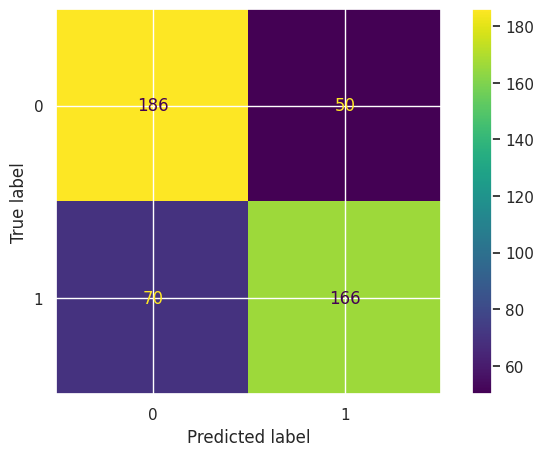

In [151]:
print('Testing Data Metrics:')
print(f'confusion_matrix:\n {confusion_matrix(y_test_res,knn_y_test_pred)}')
print(f'accuracy_score:\n {accuracy_score(y_test_res,knn_y_test_pred)}')
print(f'precision_score:\n {precision_score(y_test_res,knn_y_test_pred)}')
print(f'recall_score:\n {recall_score(y_test_res,knn_y_test_pred)}')
print(f'f1_score:\n {f1_score(y_test_res,knn_y_test_pred)}')
print(f'classification_report:\n {classification_report(y_test_res,knn_y_test_pred)}')
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test_res,knn_y_test_pred))
cmd.plot()

**From the above evaluation metrics, we can see the Gradient Boosting Classifier has performed the best in terms of accuracy, precision, recall and f1 score.**

**SQL**

1. Group the customers based on their income type and find the average of their annual income.

2. Find the female owners of cars and property.

3. Find the male customers who are staying with their families.

4. Please list the top five people having the highest income.

5. How many married people are having bad credit?

6. What is the highest education level and what is the total count?

7. Between married males and females, who is having more bad credit?

In [165]:
appdatastat.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label', 'approx_age', 'years_of_employement', 'Log_annual_income',
       'sqrt_years_of_employement'],
      dtype='object')

In [152]:
import duckdb as ddb

In [153]:
conn = ddb.connect(database=':memory:')
conn.register("appdatastat_db",appdatastat)

In [156]:
conn.execute('SELECT Type_Income, round(avg(Annual_income),2) FROM appdatastat_db group by Type_Income;').df()

,Type_Income,"round(avg(Annual_income), 2)"
0,Pensioner,285300.00
1,Working,182587.09
2,State servant,216927.84
3,Commercial associate,233367.09


In [158]:
conn.execute("SELECT * FROM appdatastat_db WHERE GENDER='F' and	Car_Owner='Y' and	Propert_Owner='Y'; ").df()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,approx_age,years_of_employement,Log_annual_income,sqrt_years_of_employement
0,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,1,1,0,Cooking staff,2,1,52,2.75,11.407565,1.658312
1,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,1,1,0,Cooking staff,2,1,52,2.75,11.407565,1.658312
2,5053254,F,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,0,0,Managers,2,1,51,5.89,12.100712,2.426932
3,5065348,F,Y,Y,0,202500.0,Working,Higher education,Married,House / apartment,...,0,0,0,High skill tech staff,2,1,42,10.89,12.218495,3.300000
4,5068389,F,Y,Y,1,270000.0,Working,Higher education,Separated,House / apartment,...,0,1,0,Sales staff,2,1,38,0.38,12.506177,0.616441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,5068367,F,Y,Y,1,270000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Laborers,3,0,39,8.89,12.506177,2.981610
115,5125172,F,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Laborers,2,0,41,1.20,11.967181,1.095445
116,5118580,F,Y,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Laborers,2,0,36,4.77,12.100712,2.184033
117,5033520,F,Y,Y,3,180000.0,Working,Secondary / secondary special,Married,Municipal apartment,...,0,1,0,Medicine staff,5,0,34,16.06,12.100712,4.007493


In [162]:
conn.execute("SELECT * FROM appdatastat_db WHERE GENDER='M' and	Housing_type='With parents'; ").df()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,approx_age,years_of_employement,Log_annual_income,sqrt_years_of_employement
0,5079166,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,...,0,0,0,Laborers,2,1,38,3.82,12.218495,1.954482
1,5079167,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,...,0,0,0,Laborers,2,1,38,3.82,12.218495,1.954482
2,5079168,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,...,0,0,0,Laborers,2,1,38,3.82,12.218495,1.954482
3,5028383,M,Y,N,0,337500.0,Working,Secondary / secondary special,Single / not married,With parents,...,0,0,0,Core staff,1,0,31,9.07,12.729321,3.011644
4,5143019,M,N,N,0,270000.0,Working,Secondary / secondary special,Married,With parents,...,1,1,0,Laborers,2,0,32,1.70,12.506177,1.303840
5,5067982,M,Y,Y,0,153000.0,Working,Higher education,Separated,With parents,...,0,0,1,Managers,1,0,55,20.93,11.938193,4.574932
6,5143573,M,Y,N,0,157500.0,Working,Incomplete higher,Married,With parents,...,1,0,0,Drivers,2,0,25,2.63,11.967181,1.621727
7,5038751,M,Y,Y,2,157500.0,Commercial associate,Higher education,Married,With parents,...,0,0,0,Drivers,4,0,39,1.72,11.967181,1.311488
8,5010203,M,Y,Y,0,135000.0,Working,Lower secondary,Married,With parents,...,0,0,1,Laborers,2,0,27,5.11,11.813030,2.260531
9,5058267,M,N,N,1,225000.0,Commercial associate,Secondary / secondary special,Married,With parents,...,0,0,0,Drivers,3,0,49,5.24,12.323856,2.289105


In [163]:
conn.execute("SELECT * FROM appdatastat_db order by Annual_income desc limit 5; ").df()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,approx_age,years_of_employement,Log_annual_income,sqrt_years_of_employement
0,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,...,0,0,0,Managers,2,0,28,6.79,14.269766,2.605763
1,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,...,0,0,0,Managers,2,0,28,6.79,14.269766,2.605763
2,5090470,M,N,Y,1,900000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Laborers,3,0,42,12.35,13.710150,3.514257
3,5079016,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,...,0,0,0,Managers,4,0,27,2.74,13.710150,1.655295
4,5079017,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,...,0,0,0,Managers,4,0,27,2.74,13.710150,1.655295


In [168]:
conn.execute("SELECT count(*) as bad_credit_families FROM appdatastat_db WHERE Marital_status='Married' and label=1; ").df()

,bad_credit_families
0,71


In [174]:
conn.execute("SELECT EDUCATION, count(*) as total_count FROM appdatastat_db WHERE EDUCATION='Higher education' group by EDUCATION order by total_count desc; ").df()

,EDUCATION,total_count
0,Higher education,295


In [170]:
conn.execute("SELECT count(*) as bad_credit_family_men FROM appdatastat_db WHERE Marital_status='Married' and GENDER='M' and label=1; ").df()

,bad_credit_family_men
0,41


In [171]:
conn.execute("SELECT count(*) as bad_credit_family_women FROM appdatastat_db WHERE Marital_status='Married' and GENDER='F' and label=1; ").df()

,bad_credit_family_women
0,30
